In [26]:
import random

In [27]:
from matplotlib import pyplot as plt
%matplotlib inline

In [28]:
import numpy as np

In [39]:
X = np.empty((0,2), float)
Y = []
for i in range(1000):
    x = np.array([[random.randint(1,100), random.randint(1,100)]])
    X = np.append(X, x, axis=0)
    Y.append(1 if x[0][0] > x[0][1] else 0)

X = X/np.linalg.norm(X, axis=0)
print X[:3]
print Y[:3]

[[ 0.0080819   0.04726977]
 [ 0.00484914  0.02010323]
 [ 0.00754311  0.02607987]]
[0, 0, 0]


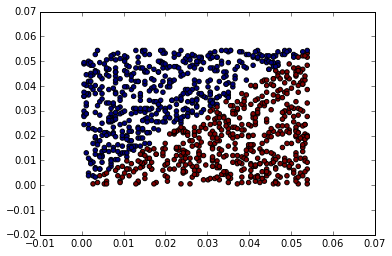

In [65]:
plt.scatter(map(lambda x: x[0], X), map(lambda x: x[1], X), c=Y)

In [41]:
import math

#sigmoid
def g(f):
    return 1/(1 + math.exp(-f))

(array([ 64.93155822, -63.70211236]), -0.07160649501459027)


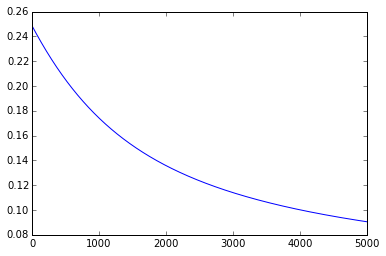

In [64]:
W = np.array([1.0, 0.1])
b = 0.1
# obj = -Y*log(g(W*X + b)) - (1-Y)*log(1-g(W*X + b))
# dobj/dw = (g(WX+b) - Y)*X
# dobj/db = (g(WX+b) - Y)
learningRate = 0.005
SqErr = []
number_epoch = 5000

for j in range(number_epoch):
    Y_hat = []
    for i in range(1000):
        Y_hat.append(g(np.dot(X[i], W) + b))
        gradW = X[i]*(Y_hat[i] - Y[i])
        gradb = (Y_hat[i] - Y[i])

        W = W - learningRate * gradW
        b = b - learningRate * gradb
    SqErr.append(sum(map(lambda ((y, y_hat)): (y - y_hat)**2, zip(Y, Y_hat)))/float(1000))
    
print (W, b)
plt.plot(range(number_epoch), SqErr)

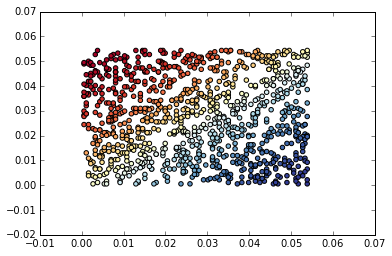

In [69]:
clr = map(lambda x: g(np.dot(W, x) + b), X)
cm = plt.cm.get_cmap('RdYlBu')
plt.scatter(map(lambda x: x[0], X), map(lambda x: x[1], X), c=clr, cmap=cm)